# Examen Alvarez

## Modulos

In [3]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.decomposition import KernelPCA, PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris, make_circles, make_moons
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, ElasticNet

cf.go_offline()

## DataSets

### Iris

In [4]:
dc_iris = load_iris()

In [5]:
df_iris = pd.DataFrame(data=dc_iris["data"], columns=dc_iris["feature_names"])

In [6]:
df_iris["target"] = dc_iris["target"]

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### XOR

In [54]:
df_xor = pd.DataFrame({"x": [1,1,0,0], "y": [1, 0, 1, 0], "xor": [0, 1, 1, 0]})

In [53]:
df_xor

,x,y,xor
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


### Medias Lunas

In [10]:
medias_lunas = make_moons()

In [11]:
df_lunas = pd.DataFrame(medias_lunas[0])

In [12]:
df_lunas["luna"] = medias_lunas[1].astype(str)

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



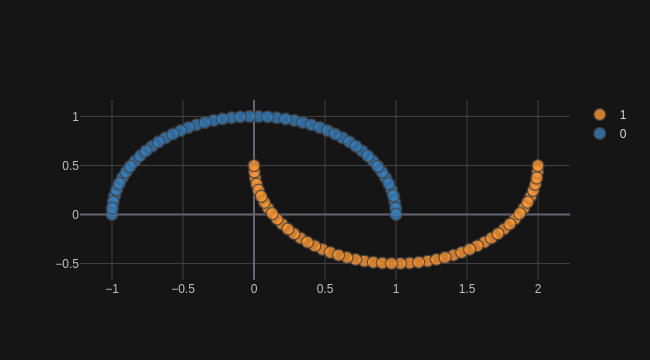

In [13]:
df_lunas.iplot(kind="scatter", x=0, y=1, categories="luna", theme="solar")

### Circulo concentrico

In [14]:
circles = make_circles()

In [15]:
df_circles = pd.DataFrame(circles[0])

In [16]:
df_circles["luna"] = circles[1].astype(str)

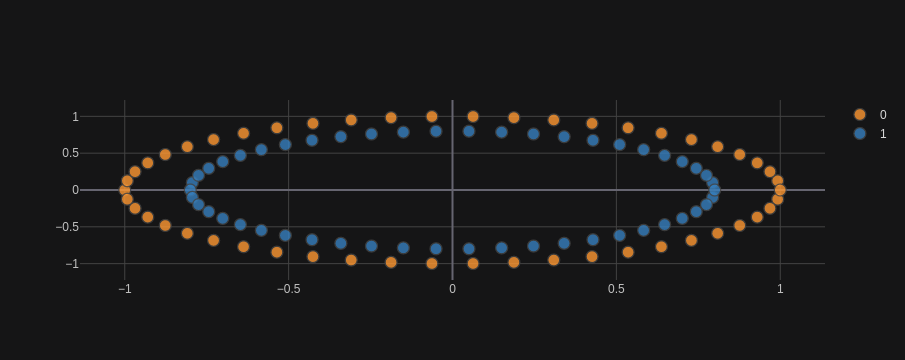

In [17]:
df_circles.iplot(kind="scatter", x=0, y=1, categories="luna", theme="solar")

## 1 Funciones discriminantes

In [18]:
lda = LinearDiscriminantAnalysis()

In [67]:
X=dc_iris.data
y= dc_iris.target

In [68]:
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [69]:
lda.coef_

array([[  6.31475846,  12.13931718, -16.94642465, -20.77005459],
       [ -1.53119919,  -4.37604348,   4.69566531,   3.06258539],
       [ -4.78355927,  -7.7632737 ,  12.25075935,  17.7074692 ]])

Note que cada fila del arreglo da los coeficientes para estimar el valor 0,1 y 2 respectivamente.

## 2 Neurona Artificial

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(1,))

In [78]:
X= df_xor[["x", "y"]]
y = df_xor[["xor"]]

In [73]:
mlp.fit(X,y)

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(1,))

In [74]:
mlp.coefs_

[array([[-0.62143264],
        [-0.60378979]]),
 array([[-0.02330982]])]

## 3 XOR Logistico

In [75]:
logreg = LogisticRegression(max_iter=10000)

In [83]:
y.values.ravel()


array([0, 1, 1, 0])

In [84]:
logreg.fit(X,y.values.ravel())

LogisticRegression(max_iter=10000)

In [85]:
logreg.coef_

array([[0., 0.]])

Como logramos ver los coeficientes son 0 dado que no encuentra una forma de segmentar el plano y decide acertar en el 50% de los casos

## 4 Sequential Forward Selection

```
SFS(Y,lim):
    k=0                  # numero de caracteristicas
    X= set()             #Generamos un conjunto vacio
    while(k!=lim-1):      
        x = Y-X            # caracteristicas no incluidas
        nuevo= argMax(X+ x) #caracteristica que mejora modelo 
        X = X + nuevo       # añadimos la caracteristica nueva
        k++                 # Tenemos una nueva caracteristica
    return X                #regresamos las caracteristicas
    
```

## 5 LDA Medias lunas

In [88]:
df_lunas.columns

Index([0, 1, 'luna'], dtype='object')

In [93]:
X=df_lunas[[0,1]]
y= df_lunas['luna']

In [96]:
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [98]:
y_hat= lda.predict(X)

In [101]:
df_lunas["y_hat"] = y_hat

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



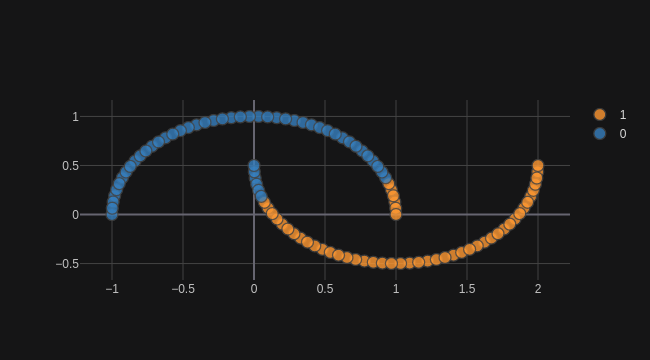

In [103]:
df_lunas.iplot(kind="scatter", x=0, y=1, categories="y_hat", theme="solar")

In [105]:
lda.score(X,y)

0.88

Como se lográ ver da una buena clasificación utilizando una recta aunque se esperaría mejor comportamiento dado que es un dataset artificial, su principal problema es que los datos no se pueden segmentar por medio de una recta, se requiere una curva.

## 6 Kernel PCA (rbf y PCA)

### 6.1 RBF

In [106]:
kpca = KernelPCA(kernel="rbf")

In [108]:
results = kpca.fit_transform(df_circles[[0, 1]])

In [109]:
results = pd.DataFrame(results)

In [112]:
results["luna"] = df_circles["luna"]

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



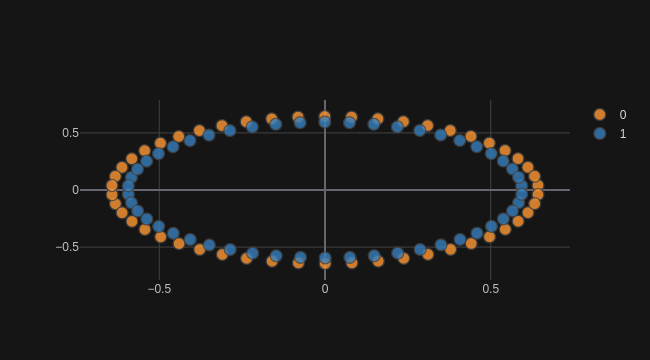

In [113]:
results.iplot(kind="scatter", theme="solar", x=0, y=1, mode="markers", categories="luna")

### 6.2 PCA

In [114]:
pca = PCA()

In [116]:
results = pca.fit_transform(df_circles[[0, 1]])

In [117]:
results = pd.DataFrame(results)

In [119]:
results["luna"] = df_circles["luna"]

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/gustavo/.local/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



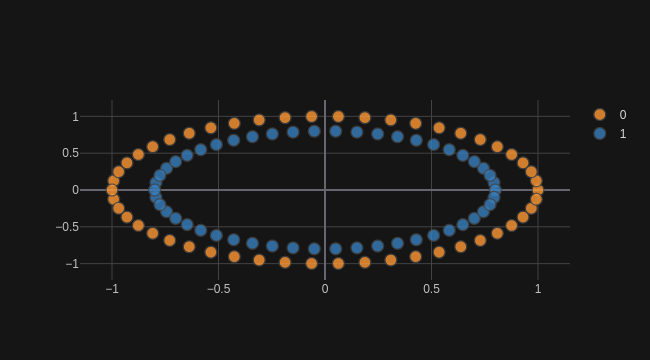

In [120]:
results.iplot(kind="scatter", theme="solar", x=0, y=1, mode="markers", categories="luna")

### Comparación

No es difícil notar que PCA hacer mejor trabajo al mantener todas las observaciones sin empalmarse, por lo cual se tiene una mejor clasificación.

## 7 Estimadores

Notesé que el estimador $\hat{\sigma}^2 = n^{-1}*\sum_{i=1}^{n} x_{i,j} - \overline{x_j}^2$ es escalable porque la media de una fila de la matriz nos tomara $\theta(n)$ y solo se calcula una vez, de misma forma su cuadrado, despues es una suma de todo los elementos de la fila al cuadrado menos una constante, i.e, $\theta(n)$ y es su totalidad el estimador nos da un comportamiento lineal y por tanto escalable.


De la misma forma el estimador $\hat{\sigma_{j,k}} = n^{-1}*\sum_{i=1}^{n} x_{i,j}x_{i,k} - \overline{x_j}* \overline{x_k}$ se realizara el doble de operaciones que en el caso anterior, pero aun cuando en el anterior teniamos $2\theta(n)$ el que sea $4\theta(n)$ asintoticamente no representa cambio y por tanto tambien es lineal y escalable.

## 8 Contenedores intervalos

```
def intervalos(n, x):
    inte=[]
    a=min(x)
    b=max(x)
    l= (b-a)/n
    for i in range(n):
        b= a + l
        contenedor= (a,b)
        inte.append(contenedor)
        a= b
    return inte
```   
    
    
    

## 9 Resorte

In [177]:
lr= LinearRegression()

In [178]:
X=np.array([.1,.21,.33,.44,.56,.67,.79]).reshape(-1,1)
y= np.array([.02,.05,.1,.11,.15,.20,.26]).reshape(-1,1)

In [179]:
lr.fit(X,y)

LinearRegression()

Valor de $\hat{\beta}$

In [180]:
lr.coef_

array([[0.33254899]])

In [181]:
df_res= pd.DataFrame(y, columns=("y",))

In [182]:
df_res["y_hat_lr"] =lr.predict(X) 


Valor de $\sigma ²$

In [183]:
df_res["y_hat_lr"].std(ddof=0)

0.07649069354111637

No hay varianza de $ \beta$ porque solo es un valor y su ecaución es 

In [189]:
print(f'y= {lr.coef_[0][-1]}*x + ({lr.intercept_[0]} )')

y= 0.332548989353495*x + (-0.020128838142262045 )


## 10 Lasso y ElasticNet

### Lasso

In [166]:
lasso = Lasso()

In [168]:
lasso.fit(X,y)

Lasso()

In [169]:
lasso.coef_

array([0.])

### ElasticNet

In [170]:
elnet = ElasticNet()

In [171]:
elnet.fit(X,y)

ElasticNet()

In [172]:
elnet.coef_

array([0.])

In [176]:
elnet.score(X,y)

0.0